In [84]:
from sklearn.datasets import load_digits
from sklearn.model_selection import KFold, train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
load_digits().keys()

dict_keys(['target_names', 'data', 'target', 'images', 'DESCR'])

In [3]:
data = load_digits().data
images = load_digits().images
targetNames = load_digits().target_names
target = load_digits().target

First image from dataset

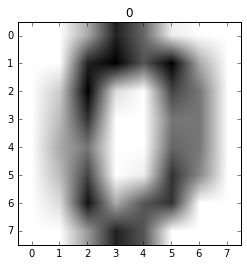

In [25]:
fi = images[0]
plt.imshow(fi, cmap="gray_r")
plt.title(target[0])

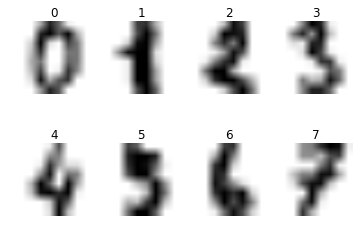

In [5]:
plotImages = [0, 99, 199, 299, 999, 1099, 1199, 1299]

for i in range(len(plotImages)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap="gray_r")
    plt.title(target[i])
    plt.axis("off")

In [6]:
data = pd.DataFrame(data)
targets = pd.Series(target)

Creating and testing KNeighboursClassifier model

In [8]:
def train(neighbours, trainFeatures, trainLabels):
    model = KNeighborsClassifier(n_neighbors=neighbours)
    model.fit(trainFeatures, trainLabels)
    return model

In [9]:
def test(model, testFeatures, testLabels):
    predictions = model.predict(testFeatures)
    return accuracy_score(predictions, testLabels)

In [10]:
def crossValidate(k):
    accuracies = []
    kfold = KFold(n_splits=4)
    
    for trainIndex, testIndex in kfold.split(data):
        trainFeatures, testFeatures = data.loc[trainIndex], data.loc[testIndex]
        trainLabels, testLabels = targets.loc[trainIndex], targets.loc[testIndex]
        model = train(k, trainFeatures, trainLabels)
        accuracy = test(model, testFeatures, testLabels)
        accuracies.append(accuracy)
    return accuracies

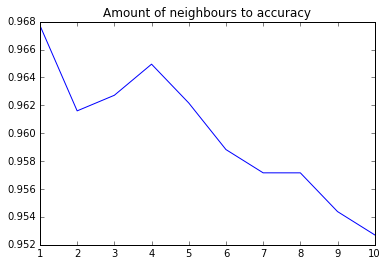

In [27]:
neighbours = np.arange(1, 11)
accuracies = []

for k in neighbours:
    accuracy = crossValidate(k)
    meanAccuracy = np.mean(accuracy)
    accuracies.append(meanAccuracy)
    
plt.plot(neighbours, accuracies)
plt.title("Amount of neighbours to accuracy")
plt.show()

Creating and testing MLPClassifier model with one hidden layer

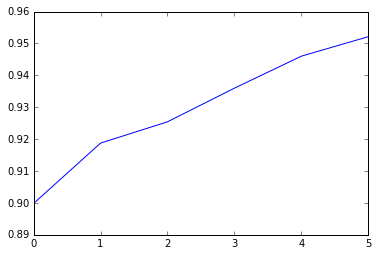

In [13]:
neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]
meanAccuracies = []

for neuron in neurons:
    kfold = KFold(n_splits=4)
    accuracies = []
    for trainIndex, testIndex in kfold.split(data):
        trainFeatures, testFeatures = data.loc[trainIndex], data.loc[testIndex]
        trainLabels, testLabels = targets.loc[trainIndex], targets.loc[testIndex]
        model = MLPClassifier(hidden_layer_sizes=neuron, max_iter=1000)
        model.fit(trainFeatures, trainLabels)
        predictions = model.predict(testFeatures)
        accuracy = accuracy_score(testLabels, predictions)
        accuracies.append(accuracy)
    meanAccuracies.append(np.mean(accuracies))

plt.plot([i for i in range(len(neurons))], meanAccuracies)
plt.show()

Creating and testing MLPClassifier model with two hidden layers

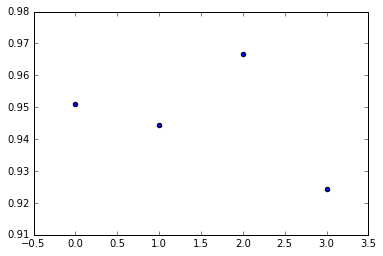

In [28]:
kfold = KFold(n_splits=4)
accuracies = []

for trainIndex, testIndex in kfold.split(data):
    trainFeatures, testFeatures = data.loc[trainIndex], data.loc[testIndex]
    trainLabels, testLabels = targets.loc[trainIndex], targets.loc[testIndex]
    model = MLPClassifier(hidden_layer_sizes=(64, 64), max_iter=1000)
    model.fit(trainFeatures, trainLabels)
    predictions = model.predict(testFeatures)
    accuracies.append(accuracy_score(testLabels, predictions))

plt.scatter(np.arange(4), accuracies)
plt.show()

Creating and testing MLPClassifier model with three hidden layers

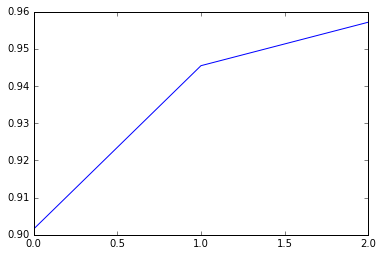

In [17]:
neurons = [(10, 10, 10), (64, 64, 64), (128, 128, 128)]
meanAccuracies = []

for neuron in neurons:
    kfold = KFold(n_splits=6)
    accuracies = []
    
    for trainIndex, testIndex in kfold.split(data):
        trainFeatures, testFeatures = data.loc[trainIndex], data.loc[testIndex]
        trainLabels, testLabels = targets.loc[trainIndex], targets.loc[testIndex]
        model = MLPClassifier(hidden_layer_sizes=neuron, max_iter=1000)
        model.fit(trainFeatures, trainLabels)
        predictions = model.predict(testFeatures)
        accuracy = accuracy_score(testLabels, predictions)
        accuracies.append(accuracy)
    meanAccuracies.append(np.mean(accuracies))

plt.plot([i for i in range(len(neurons))], meanAccuracies)
plt.show()

Creating and testing DecisionTreeClassifier model

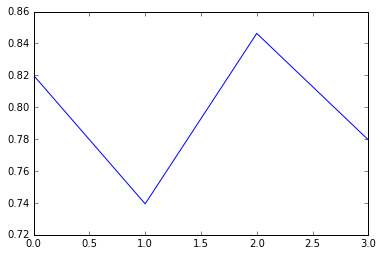

In [24]:
accuracies = []
kfold = KFold(n_splits=4)

for trainIndex, testIndex in kfold.split(data):
    trainFeatures, testFeatures = data.loc[trainIndex], data.loc[testIndex]
    trainLabels, testLabels = targets.loc[trainIndex], targets.loc[testIndex]
    model = tree.DecisionTreeClassifier()
    model.fit(trainFeatures, trainLabels)
    predictions = model.predict(testFeatures)
    accuracies.append(accuracy_score(testLabels, predictions))
    
plt.plot(np.arange(4), accuracies)
plt.show()

Creating and testing RandomForestClassifier model

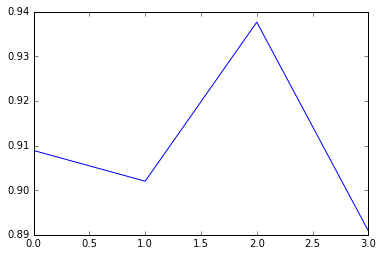

In [30]:
accuracies = []
kfold = KFold(n_splits=4)

for trainIndex, testIndex in kfold.split(data):
    trainFeatures, testFeatures = data.loc[trainIndex], data.loc[testIndex]
    trainLabels, testLabels = targets.loc[trainIndex], targets.loc[testIndex]
    model = RandomForestClassifier()
    model.fit(trainFeatures, trainLabels)
    predictions = model.predict(testFeatures)
    accuracies.append(accuracy_score(testLabels, predictions))
    
plt.plot(np.arange(4), accuracies)
plt.show()

Using different activation functions 

In [35]:
activationFuncs = ["identity","logistic", "tanh", "relu"]
neurons = [(1,), (5,), (10,), (20,), (25,), (10, 10), (16, 16), (32, 32), (64, 64)]
meanAccuracies = []
meanActivationAccuracies = []

for activation in activationFuncs:
    kfold = KFold(n_splits=4)
    meanNeuronAccuracies = []
    
    for neuron in neurons:
        accuracies = []
        for trainIndex, testIndex in kfold.split(data):
            trainFeatures, testFeatures = data.loc[trainIndex], data.loc[testIndex]
            trainLabels, testLabels = targets.loc[trainIndex], targets.loc[testIndex]
            mlp = MLPClassifier(hidden_layer_sizes=neuron, max_iter=1000, activation=activation)
            mlp.fit(trainFeatures, trainLabels)
            predictions = mlp.predict(testFeatures)
            accuracies.append(accuracy_score(testLabels, predictions))
        meanNeuronAccuracies.append(np.mean(accuracies))
    meanAccuracies.append(meanNeuronAccuracies)
    meanActivationAccuracies.append(np.mean(meanNeuronAccuracies))

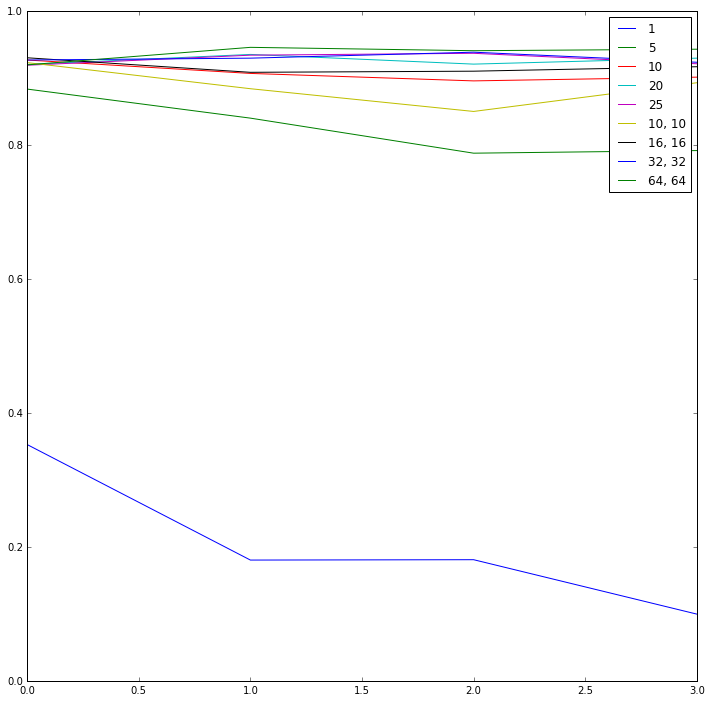

In [83]:
plt.figure(figsize=(12, 12))
plt.plot([i for i in range(len(meanAccuracies))], meanAccuracies)
plt.legend(labels=["1", "5", "10", "20", "25", "10, 10", "16, 16", "32, 32", "64, 64"])
plt.show()

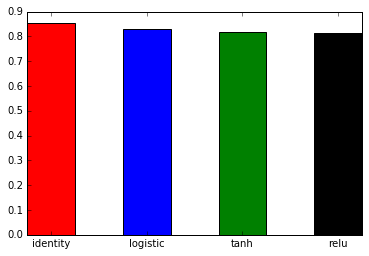

In [78]:
colors = ["red", "blue", "green", "black"]

for i in range(len(meanActivationAccuracies)):
    plt.bar(i+1, meanActivationAccuracies[i], color=colors[i], width=0.5)

plt.xticks([i+1.25 for i in range(len(activationFuncs))], activationFuncs)
plt.show()

Weights visualization

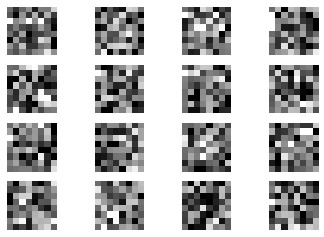

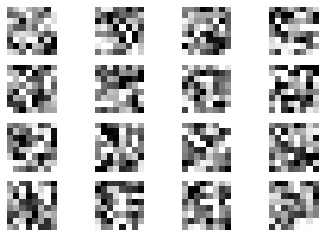

In [100]:
kfold = KFold(n_splits=2)

for trainIndex, testIndex in kfold.split(data):
    trainFeatures, testFeatures = data.loc[trainIndex], data.loc[testIndex]
    trainLabels, testLabels = targets.loc[trainIndex], targets.loc[testIndex]
    model = MLPClassifier(hidden_layer_sizes=(25,), max_iter=1000, activation="identity")
    model.fit(trainFeatures, trainLabels)
    fig, ax = plt.subplots(4, 4)
    vmin, vmax = model.coefs_[0].min(), model.coefs_[0].max()
    for coef, ax in zip(model.coefs_[0].T, ax.ravel()):
        ax.matshow(coef.reshape(8, 8), cmap="gray_r", vmin=vmin*0.5, vmax=vmax*0.5)
        ax.set_xticks(())
        ax.set_yticks(())
    plt.show()